In [1]:
# Setup

## Load packages

In [71]:
import os
import pandas as pd
import matplotlib
import requests   # manage web requests
import numpy as np   # core methods package for math and to manage various data objects; many other uses
import matplotlib.pyplot as plt  # plotting library
#from sklearn import linear_model   # data science library; not loading in jupyter
import statsmodels.formula.api as sm  # statistics library
import seaborn as sns   # data visualization library
import inspect # contains getsource() function to inspect source code
import platform # to check identifying info of python, e.g., version

## Check Python Version

In [3]:
platform.python_version()

'3.7.8'

## Set Directory Structure


### Working Directory
Not really needed on jupyter container because home directory is set. All filepaths are relative to home directory.

In [2]:
print(os.getcwd()) # check current working dir
path = '/home/jovyan/'
os.chdir(path)
print(os.getcwd()) # ensure cwd changed to desired dir

/home/jovyan/code
/home/jovyan


### Make Subdirectories

In [3]:
os.makedirs('./code', exist_ok=True)
os.makedirs('./data', exist_ok=True)
os.makedirs('./figures', exist_ok=True)
os.makedirs('./tables', exist_ok=True)

### Check Directory Contents

In [6]:
os.listdir()

['.profile',
 '.bash_logout',
 '.bashrc',
 '.ipython',
 'figures',
 'code',
 '.config',
 'tables',
 '.cache',
 '.local',
 '.git',
 'data',
 'README.md',
 'environment.yml',
 '.empty',
 '.conda']

# Load Data

In [4]:
df = pd.read_csv('./data/original/metoo_data.csv')

In [8]:
#inspect
df

,id,senator_party,condition,pid7,pre_sexism_1,pre_sexism_2,pre_sexism_3,pre_sexism_4,pre_favorability,pre_vote,...,post_vote,punishment_1,punishment_2,punishment_3,punishment_4,punishment_5,post_sexism_1,post_sexism_2,post_sexism_3,post_sexism_4
0,1,Democrat,2,Strong Republican,Agree strongly,Disagree strongly,Disagree somewhat,Agree strongly,5,3,...,7,Neither disagree nor agree,Agree somewhat,Disagree somewhat,Disagree somewhat,Disagree strongly,Disagree strongly,Disagree strongly,Disagree strongly,Disagree strongly
1,2,Republican,2,Not very strong Democrat,Disagree somewhat,Agree somewhat,Neither disagree nor agree,Disagree somewhat,5,3,...,2,Disagree somewhat,Neither disagree nor agree,Disagree somewhat,Agree somewhat,Neither disagree nor agree,Neither disagree nor agree,Agree somewhat,Neither disagree nor agree,Neither disagree nor agree
2,3,Republican,2,Strong Democrat,Disagree strongly,Neither disagree nor agree,Neither disagree nor agree,Disagree strongly,5,2,...,2,Disagree strongly,Agree strongly,Disagree strongly,Agree strongly,Neither disagree nor agree,Disagree strongly,Disagree strongly,Disagree somewhat,Disagree strongly
3,4,Republican,1,Independent,Agree somewhat,Neither disagree nor agree,Neither disagree nor agree,Neither disagree nor agree,7,6,...,7,Neither disagree nor agree,Agree somewhat,Neither disagree nor agree,Disagree somewhat,Neither disagree nor agree,Agree somewhat,Agree somewhat,Disagree strongly,Neither disagree nor agree
4,5,Democrat,3,Strong Democrat,Disagree strongly,Disagree strongly,Agree strongly,Disagree strongly,6,8,...,8,NaN,NaN,NaN,NaN,NaN,Disagree strongly,Disagree strongly,Agree strongly,Disagree strongly
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2801,2803,Democrat,1,Strong Republican,Agree somewhat,Agree somewhat,Disagree somewhat,Agree somewhat,1,2,...,3,Agree strongly,Disagree strongly,Disagree strongly,Disagree strongly,Disagree strongly,Agree strongly,Agree strongly,Disagree strongly,Agree strongly
2802,2804,Republican,2,Strong Republican,Agree somewhat,Agree somewhat,Agree somewhat,Disagree somewhat,7,10,...,8,Agree strongly,Disagree strongly,Agree strongly,Disagree strongly,Agree strongly,Agree somewhat,Agree somewhat,Agree somewhat,Disagree somewhat
2803,2805,Republican,2,Not very strong Democrat,Agree somewhat,Agree strongly,Agree strongly,Agree somewhat,8,8,...,9,Neither disagree nor agree,Agree somewhat,Disagree strongly,Disagree somewhat,Agree strongly,Agree somewhat,Agree somewhat,Agree strongly,Agree somewhat
2804,2806,Republican,3,Strong Democrat,Disagree strongly,Disagree strongly,Agree strongly,Disagree strongly,5,0,...,0,NaN,NaN,NaN,NaN,NaN,Disagree strongly,Disagree strongly,Agree strongly,Disagree strongly


In [34]:
# can also index within objects
df.iloc[0:5,0:9]
# notice first index value in python is 0

,id,senator_party,condition,pid7,pre_sexism_1,pre_sexism_2,pre_sexism_3,pre_sexism_4,pre_favorability
0,1,Democrat,2,Strong Republican,Agree strongly,Disagree strongly,Disagree somewhat,Agree strongly,5
1,2,Republican,2,Not very strong Democrat,Disagree somewhat,Agree somewhat,Neither disagree nor agree,Disagree somewhat,5
2,3,Republican,2,Strong Democrat,Disagree strongly,Neither disagree nor agree,Neither disagree nor agree,Disagree strongly,5
3,4,Republican,1,Independent,Agree somewhat,Neither disagree nor agree,Neither disagree nor agree,Neither disagree nor agree,7
4,5,Democrat,3,Strong Democrat,Disagree strongly,Disagree strongly,Agree strongly,Disagree strongly,6


In [6]:
df.dtypes

id                    int64
senator_party        object
condition             int64
pid7                 object
pre_sexism_1         object
pre_sexism_2         object
pre_sexism_3         object
pre_sexism_4         object
pre_favorability      int64
pre_vote              int64
gender               object
age                  object
newsinterest         object
post_favorability     int64
post_vote             int64
punishment_1         object
punishment_2         object
punishment_3         object
punishment_4         object
punishment_5         object
post_sexism_1        object
post_sexism_2        object
post_sexism_3        object
post_sexism_4        object
dtype: object

# Data Processing

In [5]:
# recode experimental condition
df.loc[df['condition']==1, 'condition2'] = 'Jokes'
df.loc[df['condition']==2, 'condition2'] = 'Assault'
df.loc[df['condition']==3, 'condition2'] = 'Control'

In [38]:
df.dtypes

id                    int64
senator_party        object
condition             int64
pid7                 object
pre_sexism_1         object
pre_sexism_2         object
pre_sexism_3         object
pre_sexism_4         object
pre_favorability      int64
pre_vote              int64
gender               object
age                  object
newsinterest         object
post_favorability     int64
post_vote             int64
punishment_1         object
punishment_2         object
punishment_3         object
punishment_4         object
punishment_5         object
post_sexism_1        object
post_sexism_2        object
post_sexism_3        object
post_sexism_4        object
condition2           object
dtype: object

In [6]:
# make categorical
df['condition2'] = pd.Categorical(df['condition2'])
df.dtypes

id                      int64
senator_party          object
condition               int64
pid7                   object
pre_sexism_1           object
pre_sexism_2           object
pre_sexism_3           object
pre_sexism_4           object
pre_favorability        int64
pre_vote                int64
gender                 object
age                    object
newsinterest           object
post_favorability       int64
post_vote               int64
punishment_1           object
punishment_2           object
punishment_3           object
punishment_4           object
punishment_5           object
post_sexism_1          object
post_sexism_2          object
post_sexism_3          object
post_sexism_4          object
condition2           category
dtype: object

In [8]:
# check order
df['condition2']

0       Assault
1       Assault
2       Assault
3         Jokes
4       Control
         ...   
2801      Jokes
2802    Assault
2803    Assault
2804    Control
2805      Jokes
Name: condition2, Length: 2806, dtype: category
Categories (3, object): ['Assault', 'Control', 'Jokes']

In [7]:
# relevel so Control is baseline category
# reorder
df['condition2'].cat.reorder_categories(['Control', 'Jokes', 'Assault'], inplace=True)
df['condition2ord'] = df['condition2']
df['condition2ord'].cat.reorder_categories(['Control', 'Jokes', 'Assault'], ordered=True, inplace=True)
# check order again
df['condition2']

0       Assault
1       Assault
2       Assault
3         Jokes
4       Control
         ...   
2801      Jokes
2802    Assault
2803    Assault
2804    Control
2805      Jokes
Name: condition2, Length: 2806, dtype: category
Categories (3, object): ['Control', 'Jokes', 'Assault']

In [10]:
# and check order of ordinal version
df['condition2ord']

0       Assault
1       Assault
2       Assault
3         Jokes
4       Control
         ...   
2801      Jokes
2802    Assault
2803    Assault
2804    Control
2805      Jokes
Name: condition2ord, Length: 2806, dtype: category
Categories (3, object): ['Control' < 'Jokes' < 'Assault']

In [10]:
# create new variable: pid3 ####

pd.crosstab(df['pid7'], df.pid7)
# notice two different ways of indexing

pid7,Independent,Lean Democrat,Lean Republican,Not sure,Not very strong Democrat,Not very strong Republican,Strong Democrat,Strong Republican
pid7,,,,,,,,
Independent,631,0,0,0,0,0,0,0
Lean Democrat,0,377,0,0,0,0,0,0
Lean Republican,0,0,269,0,0,0,0,0
Not sure,0,0,0,23,0,0,0,0
Not very strong Democrat,0,0,0,0,359,0,0,0
Not very strong Republican,0,0,0,0,0,200,0,0
Strong Democrat,0,0,0,0,0,0,629,0
Strong Republican,0,0,0,0,0,0,0,318


In [8]:
df.pid3 = 'NaN'

df.loc[df['pid7']=='Lean Democrat', 'pid3'] = 'Democrat'
df.loc[df['pid7']=='Strong Democrat', 'pid3'] = 'Democrat'
df.loc[df['pid7']=='Not very strong Democrat', 'pid3'] = 'Democrat'

df.loc[df['pid7']=='Lean Republican', 'pid3'] = 'Republican'
df.loc[df['pid7']=='Strong Republican', 'pid3'] = 'Republican'
df.loc[df['pid7']=='Not very strong Republican', 'pid3'] = 'Republican'

df.loc[df['pid7']=='Independent', 'pid3'] = 'Independent'
df.loc[df['pid7']=='Not sure', 'pid3'] = 'Independent'

# make categorical
df['pid3'] = pd.Categorical(df['pid3'])

In [9]:
# recode: punishment 

# punishment 1
df.loc[df.punishment_1=="Agree strongly", 'needmoreevidence'] = 5
df.loc[df.punishment_1=="Agree somewhat", 'needmoreevidence'] = 4
df.loc[df.punishment_1=="Neither disagree nor agree", 'needmoreevidence'] = 3
df.loc[df.punishment_1=="Disagree somewhat", 'needmoreevidence'] = 2
df.loc[df.punishment_1=="Disagree strongly", 'needmoreevidence'] = 1

pd.crosstab(df['needmoreevidence'], df['needmoreevidence'])

needmoreevidence,1.0,2.0,3.0,4.0,5.0
needmoreevidence,,,,,
1.0,276,0,0,0,0
2.0,0,415,0,0,0
3.0,0,0,290,0,0
4.0,0,0,0,560,0
5.0,0,0,0,0,329


In [ ]:
# punishment 2

df.loc[df.punishment_2=="Agree strongly", 'apology'] = 5
df.loc[df.punishment_2=="Agree somewhat", 'apology'] = 4
df.loc[df.punishment_2=="Neither disagree nor agree", 'apology'] = 3
df.loc[df.punishment_2=="Disagree somewhat", 'apology'] = 2
df.loc[df.punishment_2=="Disagree strongly", 'apology'] = 1

# punishment 3
df.loc[df.punishment_3=="Agree strongly", 'longtimeago'] = 5
df.loc[df.punishment_3=="Agree somewhat", 'longtimeago'] = 4
df.loc[df.punishment_3=="Neither disagree nor agree", 'longtimeago'] = 3
df.loc[df.punishment_3=="Disagree somewhat", 'longtimeago'] = 2
df.loc[df.punishment_3=="Disagree strongly", 'longtimeago'] = 1
pd.crosstab(df.longtimeago, df.longtimeago)

# punishment 4
df.loc[df.punishment_3=="Agree strongly", 'resign'] = 5
df.loc[df.punishment_3=="Agree somewhat", 'resign'] = 4
df.loc[df.punishment_3=="Neither disagree nor agree", 'resign'] = 3
df.loc[df.punishment_3=="Disagree somewhat", 'resign'] = 2
df.loc[df.punishment_3=="Disagree strongly", 'resign'] = 1

# punishment 5
df.loc[df.punishment_3=="Agree strongly", 'elitecues'] = 5
df.loc[df.punishment_3=="Agree somewhat", 'elitecues'] = 4
df.loc[df.punishment_3=="Neither disagree nor agree", 'elitecues'] = 3
df.loc[df.punishment_3=="Disagree somewhat", 'elitecues'] = 2
df.loc[df.punishment_3=="Disagree strongly", 'elitecues'] = 1

# recode punishment: reverse codes
# need more evidence
df.loc[df.punishment_1=="Agree strongly", 'needmoreevidence_reverse'] = 1
df.loc[df.punishment_1=="Agree somewhat", 'needmoreevidence_reverse'] = 2
df.loc[df.punishment_1=="Neither disagree nor agree", 'needmoreevidence_reverse'] = 3
df.loc[df.punishment_1=="Disagree somewhat", 'needmoreevidence_reverse'] = 4
df.loc[df.punishment_1=="Disagree strongly", 'needmoreevidence_reverse'] = 5

# long time ago
df.loc[df.punishment_3=="Agree strongly", 'longtimeago_reverse'] = 1
df.loc[df.punishment_3=="Agree somewhat", 'longtimeago_reverse'] = 2
df.loc[df.punishment_3=="Neither disagree nor agree", 'longtimeago_reverse'] = 3
df.loc[df.punishment_3=="Disagree somewhat", 'longtimeago_reverse'] = 4
df.loc[df.punishment_3=="Disagree strongly", 'longtimeago_reverse'] = 5

# new variable: mean punitiveness score ####
df.meanpunishment = ((df.apology+df.resign+df.needmoreevidence_reverse+df.longtimeago_reverse)/4)

In [ ]:
pd.crosstab(df.needmoreevidence_reverse, df.needmoreevidence)

In [ ]:
pd.crosstab(df.longtimeago_reverse, df.longtimeago)

In [13]:
## new variable: same party as legislator####
pd.crosstab(df.senator_party, df.senator_party)

senator_party,Democrat,Republican
senator_party,,
Democrat,1407,0
Republican,0,1399


In [10]:
df.loc[((df['pid3'] == 'Democrat') & (df['senator_party'] == 'Democrat')) | 
       ((df.pid3=="Republican") and (df.senator_party=="Republican")), 'sameparty'] = 'Same party' 

df.loc[((df['pid3'] == 'Democrat') & (df['senator_party'] == 'Republican')) | 
       ((df.pid3=="Republican") and (df.senator_party=="Democrat")), 'sameparty'] = 'Opposite party' 

df.loc[df['pid3'] == 'Independent', 'sameparty'] = 'Independents/Not sures' 

#make categorical
df.sameparty = pd.Categorical(df['sameparty'])

In [20]:
df.dtypes

id                      int64
senator_party          object
condition               int64
pid7                   object
pre_sexism_1           object
pre_sexism_2           object
pre_sexism_3           object
pre_sexism_4           object
pre_favorability        int64
pre_vote                int64
gender                 object
age                    object
newsinterest           object
post_favorability       int64
post_vote               int64
punishment_1           object
punishment_2           object
punishment_3           object
punishment_4           object
punishment_5           object
post_sexism_1          object
post_sexism_2          object
post_sexism_3          object
post_sexism_4          object
condition2           category
pid3                 category
needmoreevidence      float64
sameparty            category
dtype: object

In [12]:
# recode: pre sexism ####
# sexism_1,2,4 reverse coded

# create dictionaries for sexism
sexism_dict1 = { 'Agree strongly':5,
              'Agree somewhat':4,
               'Neither disagree nor agree':3,
               'Disagree somewhat':2,
               'Disagree strongly':1
              }
sexism_dict2 = { 'Agree strongly':1,
              'Agree somewhat':2,
               'Neither disagree nor agree':3,
               'Disagree somewhat':4,
               'Disagree strongly':5
              }

# use sexism_dict1 to recode 1, 2, and 4; use sexism_dict2 to recode 3
# see original R code from authors
df['pre_sexism_1new'] = df.pre_sexism_1.map(sexism_dict1)
df['pre_sexism_2new'] = df.pre_sexism_2.map(sexism_dict1)
df['pre_sexism_3new'] = df.pre_sexism_3.map(sexism_dict2) # using second dictionary here
df['pre_sexism_4new'] = df.pre_sexism_4.map(sexism_dict1)

# new variable: pre_sexism ####
df['pre_sexism'] = ((df['pre_sexism_1new'] + df['pre_sexism_2new'] + df['pre_sexism_3new'] + df['pre_sexism_4new'])/4)

In [13]:
# recode: post sexism ####
# sexism_1,2,4 reverse coded

# create same dictionaries as for pre_sexism

# use sexism_dict1 to recode 1, 2, and 4; use sexism_dict2 to recode 3
# see original R code from authors
df['post_sexism_1new'] = df.post_sexism_1.map(sexism_dict1)
df['post_sexism_2new'] = df.post_sexism_2.map(sexism_dict1)
df['post_sexism_3new'] = df.post_sexism_3.map(sexism_dict2) # using second dictionary here
df['post_sexism_4new'] = df.post_sexism_4.map(sexism_dict1)

# new variable: post_sexism ####
df['post_sexism'] = ((df['post_sexism_1new'] + df['post_sexism_2new'] + df['post_sexism_3new'] + df['post_sexism_4new'])/4)

In [14]:

### new variable: raw change from pretest to posttest ####
# favorability
df['change_favorability'] = (df.post_favorability+1) - (df.pre_favorability+1)

# vote
df['change_vote'] = (df.post_vote) - (df.pre_vote)

# sexism
df['change_sexism'] = (df.post_sexism) - (df.pre_sexism)

### new variable: percent change from pretest to posttest ##### favorability
df['perchange_favorability'] = (((df.post_favorability+1) - (df.pre_favorability+1))/(df.pre_favorability+1))*100

# vote
df['perchange_vote'] = (((df.post_vote+1) - (df.pre_vote+1))/(df.pre_vote+1))*100

# sexism
df['perchange_sexism'] = (((df['post_sexism']+1) - (df['pre_sexism']+1))/(df['pre_sexism']+1))*100


In [26]:
df

,id,senator_party,condition,pid7,pre_sexism_1,pre_sexism_2,pre_sexism_3,pre_sexism_4,pre_favorability,pre_vote,...,post_sexism_2new,post_sexism_3new,post_sexism_4new,post_sexism,perchange_favorability,change_favorability,change_vote,change_sexism,perchange_vote,perchange_sexism
0,1,Democrat,2,Strong Republican,Agree strongly,Disagree strongly,Disagree somewhat,Agree strongly,5,3,...,1,5,1,2.00,0.000000,0,4,-1.75,100.000000,-36.842105
1,2,Republican,2,Not very strong Democrat,Disagree somewhat,Agree somewhat,Neither disagree nor agree,Disagree somewhat,5,3,...,4,3,3,3.25,-50.000000,-3,-1,0.50,-25.000000,13.333333
2,3,Republican,2,Strong Democrat,Disagree strongly,Neither disagree nor agree,Neither disagree nor agree,Disagree strongly,5,2,...,1,4,1,1.75,-50.000000,-3,0,-0.25,0.000000,-8.333333
3,4,Republican,1,Independent,Agree somewhat,Neither disagree nor agree,Neither disagree nor agree,Neither disagree nor agree,7,6,...,4,5,3,4.00,-25.000000,-2,1,0.75,14.285714,17.647059
4,5,Democrat,3,Strong Democrat,Disagree strongly,Disagree strongly,Agree strongly,Disagree strongly,6,8,...,1,1,1,1.00,14.285714,1,0,0.00,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2801,2803,Democrat,1,Strong Republican,Agree somewhat,Agree somewhat,Disagree somewhat,Agree somewhat,1,2,...,5,5,5,5.00,150.000000,3,1,1.00,33.333333,20.000000
2802,2804,Republican,2,Strong Republican,Agree somewhat,Agree somewhat,Agree somewhat,Disagree somewhat,7,10,...,4,2,2,3.00,-12.500000,-1,-2,0.00,-18.181818,0.000000
2803,2805,Republican,2,Not very strong Democrat,Agree somewhat,Agree strongly,Agree strongly,Agree somewhat,8,8,...,4,1,4,3.25,-22.222222,-2,1,-0.25,11.111111,-5.555556
2804,2806,Republican,3,Strong Democrat,Disagree strongly,Disagree strongly,Agree strongly,Disagree strongly,5,0,...,1,1,1,1.00,0.000000,0,0,0.00,0.000000,0.000000


In [27]:
df.dtypes

id                           int64
senator_party               object
condition                    int64
pid7                        object
pre_sexism_1                object
pre_sexism_2                object
pre_sexism_3                object
pre_sexism_4                object
pre_favorability             int64
pre_vote                     int64
gender                      object
age                         object
newsinterest                object
post_favorability            int64
post_vote                    int64
punishment_1                object
punishment_2                object
punishment_3                object
punishment_4                object
punishment_5                object
post_sexism_1               object
post_sexism_2               object
post_sexism_3               object
post_sexism_4               object
condition2                category
condition2ord             category
pid3                      category
needmoreevidence           float64
sameparty           

In [15]:
# subset: without independents/notsures 
partydat = df[df["sameparty"] != 'Independents/Not sures']

# subset: people that share party with senator, people that do not share party with senator
samepartydat = df[df["sameparty"] != 'Same party']
opppartydat = df[df["sameparty"] != 'Opposite party']

# Model 1

In [16]:
# using statsmodels
m1a = sm.ols(formula="perchange_favorability ~ condition2", 
                data=samepartydat).fit()
m1b = sm.ols(formula="perchange_favorability ~ condition2", 
                data=opppartydat).fit()
m1a.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     perchange_favorability   R-squared:                       0.162
Model:                                OLS   Adj. R-squared:                  0.161
Method:                     Least Squares   F-statistic:                     205.5
Date:                    Fri, 01 Jan 2021   Prob (F-statistic):           2.57e-82
Time:                            17:13:57   Log-Likelihood:                -10280.
No. Observations:                    2127   AIC:                         2.057e+04
Df Residuals:                        2124   BIC:                         2.058e+04
Df Model:                               2                                         
Covariance Type:                nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 3.7228      1.144      3.255      0.001       1.480       5.966
condition2[T.Jokes]     -21.9733      1.617    -13.588      0.000     -25.145     -18.802
condition2[T.Assault]   -32.0210      1.615    -19.829      0.000     -35.188     -28.854
==============================================================================
Omnibus:                     1924.672   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           268734.944
Skew:                           3.713   Prob(JB):                         0.00
Kurtosis:                      57.563   Cond. No.                         3.74
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
m1b.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     perchange_favorability   R-squared:                       0.156
Model:                                OLS   Adj. R-squared:                  0.155
Method:                     Least Squares   F-statistic:                     195.5
Date:                    Fri, 01 Jan 2021   Prob (F-statistic):           1.21e-78
Time:                            02:31:32   Log-Likelihood:                -10034.
No. Observations:                    2120   AIC:                         2.007e+04
Df Residuals:                        2117   BIC:                         2.009e+04
Df Model:                               2                                         
Covariance Type:                nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 2.9102      1.035      2.812      0.005       0.880       4.940
condition2[T.Jokes]     -18.5953      1.470    -12.649      0.000     -21.478     -15.712
condition2[T.Assault]   -28.4166      1.458    -19.487      0.000     -31.276     -25.557
==============================================================================
Omnibus:                     2015.004   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           433174.132
Skew:                           3.894   Prob(JB):                         0.00
Kurtosis:                      72.593   Cond. No.                         3.73
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
coef_df = pd.DataFrame()
for i, mod in enumerate([m1a, m1b]):
    errorbars = mod.params - mod.conf_int()[0]
    coef_df = coef_df.append(pd.DataFrame({'coef': mod.params.values[1:],
                                           'err': errorbars.values[1:],
                                           'varname': errorbars.index.values[1:],
                                           'model': 'model %d'%(i+1)
                                          })
                            )
coef_df

,coef,err,varname,model
0,-21.973304,3.171240,condition2[T.Jokes],model 1
1,-32.020991,3.166786,condition2[T.Assault],model 1
0,-18.595308,2.883096,condition2[T.Jokes],model 2
1,-28.416642,2.859714,condition2[T.Assault],model 2


/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator


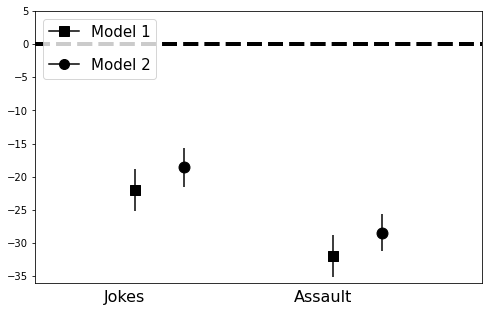

In [18]:
# Figure 1
marker_list = 'so'
width=.25
## 2 covariates in total
base_x = np.arange(2) - 0.2
base_x

fig, ax = plt.subplots(figsize=(8, 5))
for i, mod in enumerate(coef_df.model.unique()):
    mod_df = coef_df[coef_df.model == mod]
    mod_df = mod_df.set_index('varname').reindex(coef_df['varname'].unique())
    ## offset x posistions
    X = base_x + width*(i+1)
    ax.bar(X, mod_df['coef'],  
           color='none',yerr=mod_df['err'])
    ## remove axis labels
    ax.set_ylabel('')
    ax.set_xlabel('')
    ax.scatter(x=X, 
               marker=marker_list[i], s=120, 
               y=mod_df['coef'], color='black')
    ax.axhline(y=0, linestyle='--', color='black', linewidth=4)
    ax.xaxis.set_ticks_position('none')
    _ = ax.set_xticklabels(['', 'Jokes', '', 'Assault'], 
                           rotation=0, fontsize=16)
    # set ylim
    ax.set_ylim(bottom=-36, top=5)


    
## finally, build customized legend
legend_elements = [plt.Line2D([0], [0], marker=m,  # added plt. before Line2D because Line2D not defined
                          label='Model %d'%(i+1),
                          color = 'k',
                          markersize=10)
                   for i, m in enumerate(marker_list)
                  ]
_ = ax.legend(handles=legend_elements, loc=2, 
              prop={'size': 15}, labelspacing=1.2)

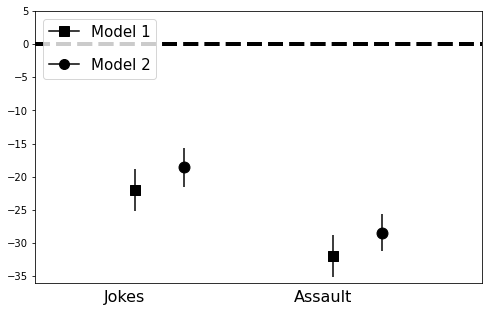

In [19]:
fig

In [20]:
fig.savefig('./figures/fig1.png', bbox_inches='tight', dpi=300)

In [ ]:
## Percent Change Vote

In [21]:
m2a = sm.ols(formula="perchange_vote ~ condition2", 
                data=samepartydat).fit()
m2b = sm.ols(formula="perchange_vote ~ condition2", 
                data=opppartydat).fit() 
m2a.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         perchange_vote   R-squared:                       0.085
Model:                            OLS   Adj. R-squared:                  0.084
Method:                 Least Squares   F-statistic:                     98.46
Date:                Fri, 01 Jan 2021   Prob (F-statistic):           1.28e-41
Time:                        17:14:18   Log-Likelihood:                -10652.
No. Observations:                2127   AIC:                         2.131e+04
Df Residuals:                    2124   BIC:                         2.133e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 4.9922      1.362      3.665      0.000       2.321       7.664
condition2[T.Jokes]     -17.4062      1.926     -9.038      0.000     -21.183     -13.629
condition2[T.Assault]   -26.5748      1.923    -13.818      0.000     -30.346     -22.803
==============================================================================
Omnibus:                     2698.808   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           753350.381
Skew:                           6.582   Prob(JB):                         0.00
Kurtosis:                      94.253   Cond. No.                         3.74
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
m2b.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         perchange_vote   R-squared:                       0.097
Model:                            OLS   Adj. R-squared:                  0.096
Method:                 Least Squares   F-statistic:                     114.0
Date:                Fri, 01 Jan 2021   Prob (F-statistic):           9.80e-48
Time:                        02:32:08   Log-Likelihood:                -10429.
No. Observations:                2120   AIC:                         2.086e+04
Df Residuals:                    2117   BIC:                         2.088e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 3.9041      1.247      3.131      0.002       1.459       6.349
condition2[T.Jokes]     -15.9206      1.771     -8.989      0.000     -19.394     -12.447
condition2[T.Assault]   -26.3485      1.757    -14.999      0.000     -29.794     -22.903
==============================================================================
Omnibus:                     2692.245   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           873001.197
Skew:                           6.526   Prob(JB):                         0.00
Kurtosis:                     101.553   Cond. No.                         3.73
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
coef_df = pd.DataFrame()
for i, mod in enumerate([m2a, m2b]):
    errorbars = mod.params - mod.conf_int()[0]
    coef_df = coef_df.append(pd.DataFrame({'coef': mod.params.values[1:],
                                           'err': errorbars.values[1:],
                                           'varname': errorbars.index.values[1:],
                                           'model': 'model %d'%(i+1)
                                          })
                            )
coef_df

,coef,err,varname,model
0,-17.406163,3.776786,condition2[T.Jokes],model 1
1,-26.574803,3.771482,condition2[T.Assault],model 1
0,-15.920648,3.473194,condition2[T.Jokes],model 2
1,-26.348509,3.445027,condition2[T.Assault],model 2


/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator


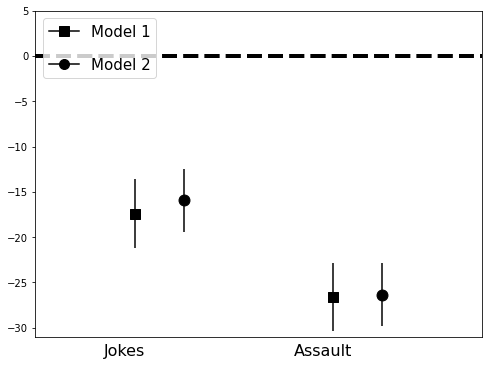

In [23]:
# Figure 2
marker_list = 'so'
width=.25
## 2 covariates in total
base_x = np.arange(2) - 0.2
base_x

fig, ax = plt.subplots(figsize=(8, 6))
for i, mod in enumerate(coef_df.model.unique()):
    mod_df = coef_df[coef_df.model == mod]
    mod_df = mod_df.set_index('varname').reindex(coef_df['varname'].unique())
    ## offset x posistions
    X = base_x + width*(i+1)
    ax.bar(X, mod_df['coef'],  
           color='none',yerr=mod_df['err'])
    ## remove axis labels
    ax.set_ylabel('')
    ax.set_xlabel('')
    ax.scatter(x=X, 
               marker=marker_list[i], s=120, 
               y=mod_df['coef'], color='black')
    ax.axhline(y=0, linestyle='--', color='black', linewidth=4)
    ax.xaxis.set_ticks_position('none')
    _ = ax.set_xticklabels(['', 'Jokes', '', 'Assault'], 
                           rotation=0, fontsize=16)
    # set ylim
    ax.set_ylim(bottom=-31, top=5)


    
## finally, build customized legend
legend_elements = [plt.Line2D([0], [0], marker=m,  # added plt. before Line2D because Line2D not defined
                          label='Model %d'%(i+1),
                          color = 'k',
                          markersize=10)
                   for i, m in enumerate(marker_list)
                  ]
_ = ax.legend(handles=legend_elements, loc=2, 
              prop={'size': 15}, labelspacing=1.2)

In [24]:
fig.savefig('./figures/fig2.png', bbox_inches='tight', dpi=300)

In [ ]:
## Percent Change Sexism

In [25]:
# percent change sexism ####

m3a = sm.ols(formula="perchange_sexism ~ condition2", 
                data=samepartydat).fit()
m3b = sm.ols(formula="perchange_sexism ~ condition2", 
                data=opppartydat).fit() 
m3a.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       perchange_sexism   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     3.839
Date:                Fri, 01 Jan 2021   Prob (F-statistic):             0.0217
Time:                        17:14:31   Log-Likelihood:                -7940.0
No. Observations:                2127   AIC:                         1.589e+04
Df Residuals:                    2124   BIC:                         1.590e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -0.3582      0.381     -0.941      0.347      -1.105       0.388
condition2[T.Jokes]       1.4456      0.538      2.686      0.007       0.390       2.501
condition2[T.Assault]     0.4069      0.537      0.757      0.449      -0.647       1.461
==============================================================================
Omnibus:                      652.747   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6891.971
Skew:                           1.133   Prob(JB):                         0.00
Kurtosis:                      11.522   Cond. No.                         3.74
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
m3b.summary()

In [26]:
coef_df = pd.DataFrame()
for i, mod in enumerate([m3a, m3b]):
    errorbars = mod.params - mod.conf_int()[0]
    coef_df = coef_df.append(pd.DataFrame({'coef': mod.params.values[1:],
                                           'err': errorbars.values[1:],
                                           'varname': errorbars.index.values[1:],
                                           'model': 'model %d'%(i+1)
                                          })
                            )
coef_df

,coef,err,varname,model
0,1.445640,1.055405,condition2[T.Jokes],model 1
1,0.406884,1.053922,condition2[T.Assault],model 1
0,1.810067,1.059359,condition2[T.Jokes],model 2
1,0.710359,1.050767,condition2[T.Assault],model 2


/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator


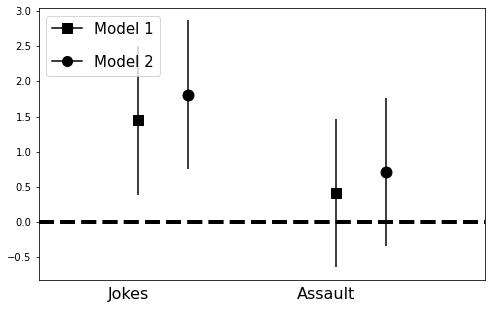

In [27]:
# Figure 3
marker_list = 'so'
width=.25
## 2 covariates in total
base_x = np.arange(2) - 0.2
base_x

fig, ax = plt.subplots(figsize=(8, 5))
for i, mod in enumerate(coef_df.model.unique()):
    mod_df = coef_df[coef_df.model == mod]
    mod_df = mod_df.set_index('varname').reindex(coef_df['varname'].unique())
    ## offset x posistions
    X = base_x + width*(i+1)
    ax.bar(X, mod_df['coef'],  
           color='none',yerr=mod_df['err'])
    ## remove axis labels
    ax.set_ylabel('')
    ax.set_xlabel('')
    ax.scatter(x=X, 
               marker=marker_list[i], s=120, 
               y=mod_df['coef'], color='black')
    ax.axhline(y=0, linestyle='--', color='black', linewidth=4)
    ax.xaxis.set_ticks_position('none')
    _ = ax.set_xticklabels(['', 'Jokes', '', 'Assault'], 
                           rotation=0, fontsize=16)


    
## finally, build customized legend
legend_elements = [plt.Line2D([0], [0], marker=m,  # added plt. before Line2D because Line2D not defined
                          label='Model %d'%(i+1),
                          color = 'k',
                          markersize=10)
                   for i, m in enumerate(marker_list)
                  ]
_ = ax.legend(handles=legend_elements, loc=2, 
              prop={'size': 15}, labelspacing=1.2)

In [28]:
fig.savefig('./figures/fig3.png', bbox_inches='tight', dpi=300)

## CONDITIONAL ON SEXISM 

In [56]:
## CONDITIONAL ON SEXISM ####
m5 = sm.ols(formula="perchange_favorability ~ condition2 + pre_sexism + condition2*pre_sexism", 
                data=df).fit()
m5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     perchange_favorability   R-squared:                       0.255
Model:                                OLS   Adj. R-squared:                  0.254
Method:                     Least Squares   F-statistic:                     191.5
Date:                    Fri, 01 Jan 2021   Prob (F-statistic):          6.97e-176
Time:                            17:43:49   Log-Likelihood:                -13322.
No. Observations:                    2806   AIC:                         2.666e+04
Df Residuals:                        2800   BIC:                         2.669e+04
Df Model:                               5                                         
Covariance Type:                nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                            5.3696      2.325      2.310      0.021       0.811       9.928
condition2[T.Jokes]                -41.0726      3.301    -12.444      0.000     -47.544     -34.601
condition2[T.Assault]              -65.4236      3.309    -19.774      0.000     -71.911     -58.936
pre_sexism                          -0.7405      0.898     -0.825      0.410      -2.501       1.020
condition2[T.Jokes]:pre_sexism       7.7373      1.279      6.048      0.000       5.229      10.246
condition2[T.Assault]:pre_sexism    13.1697      1.267     10.391      0.000      10.685      15.655
==============================================================================
Omnibus:                     2573.963   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           422788.499
Skew:                           3.782   Prob(JB):                         0.00
Kurtosis:                      62.657   Cond. No.                         27.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

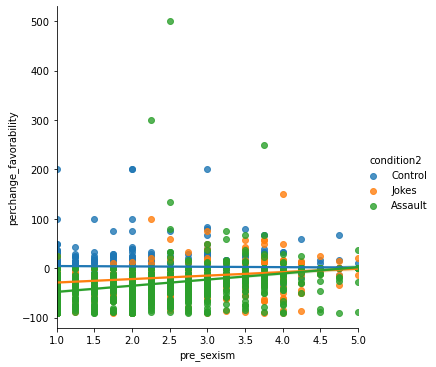

In [57]:
sns.lmplot(x="pre_sexism", y="perchange_favorability", hue="condition2", data=df)

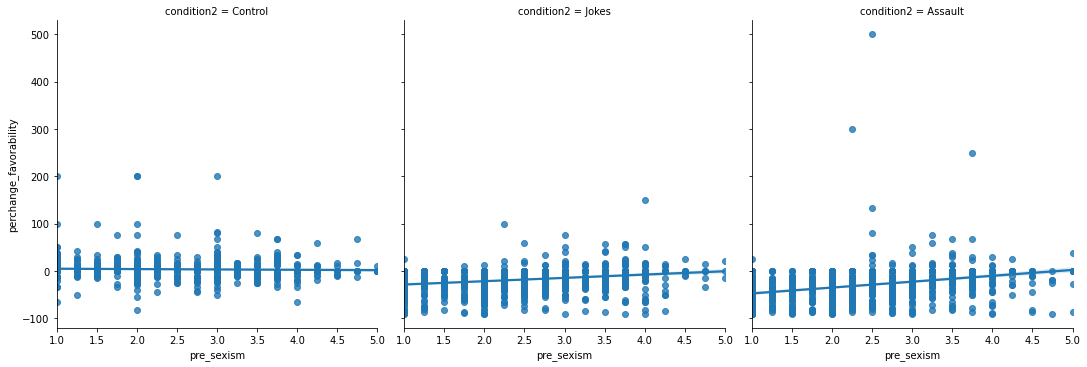

In [58]:
sns.lmplot(x="pre_sexism", y="perchange_favorability", col="condition2", data=df)

In [54]:
m1.params

Intercept                 3.722786
condition2[T.Assault]   -32.020991
condition2[T.Jokes]     -21.973304
dtype: float64

In [56]:
m1.conf_int()

,0,1
Intercept,1.479588,5.965983
condition2[T.Assault],-35.187778,-28.854205
condition2[T.Jokes],-25.144545,-18.802064


In [62]:
errorbars = m1.params - m1.conf_int()[0]
errorbars

Intercept                2.243198
condition2[T.Assault]    3.166786
condition2[T.Jokes]      3.171240
dtype: float64

In [63]:
# ignore intercept 
coef_df = pd.DataFrame({'coef': m1.params.values[1:],
                        'err': errorbars.values[1:],
                        'varname': errorbars.index.values[1:]
                       })
coef_df

,coef,err,varname
0,-32.020991,3.166786,condition2[T.Assault]
1,-21.973304,3.171240,condition2[T.Jokes]


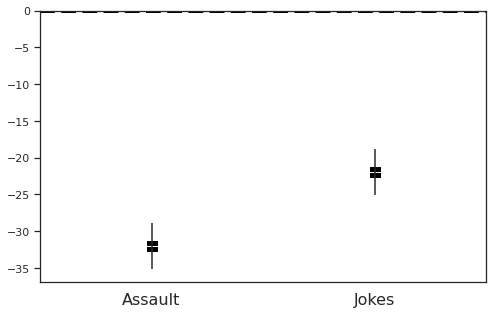

In [73]:
#plot
fig, ax = plt.subplots(figsize=(8, 5))
coef_df.plot(x='varname', y='coef', kind='bar', 
             ax=ax, color='none', 
             yerr='err', legend=False)
ax.set_ylabel('')
ax.set_xlabel('')
ax.scatter(x=np.arange(coef_df.shape[0]), 
           marker='s', s=120, 
           y=coef_df['coef'], color='black')
ax.axhline(y=0, linestyle='--', color='black', linewidth=4)
ax.xaxis.set_ticks_position('none')
_ = ax.set_xticklabels(['Assault', 'Jokes'#, 'Edu.', 'Catholic', 'Infant Mort.'
                       ], 
                       rotation=0, fontsize=16)


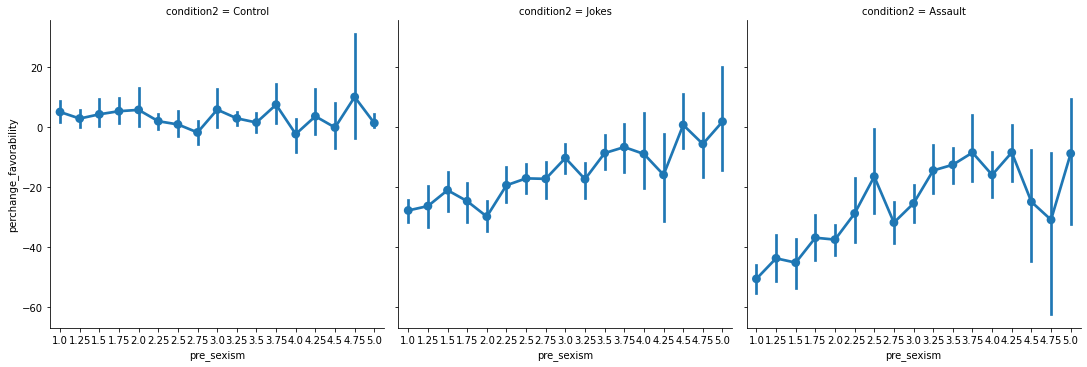

In [43]:
sns.catplot(x="pre_sexism", y="perchange_favorability", col="condition2", kind="point", data=df)

AttributeError: module 'statsmodels.graphics' has no attribute 'factorplots'

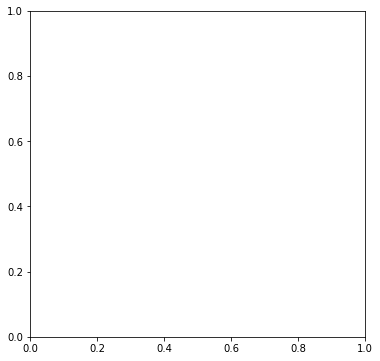

In [73]:
fig, ax = plt.subplots(figsize=(6, 6))
import statsmodels
fig = statsmodels.graphics.factorplots.interaction_plot(x=df.pre_sexism, trace=df.condition2, response=df.perchange_favorability,
                       colors=['yellow', 'blue', 'red'], markers=['D', '^', 'o'], ms=10, ax=ax)

In [60]:
# calculate values of modifying var Z (here, pre_sexism)
# df.pre_sexism.describe()
# pre_sexism ranges from 1-5 and increases in small increments
# so draw random sample of 500 obs from uniform distribution between 1-5
MVZ = np.random.uniform(1,5,500)
MVZ = sorted(MVZ)
# put them in dataframe and add other vars
intdf = pd.DataFrame()
intdf['MVZ'] = MVZ
intdf['b1'] = m5.params[1]
intdf['b2'] = m5.params[2]
intdf['b4'] = m5.params[4]
intdf['b5'] = m5.params[5]
# var-cov matrix is:
varcovm5 = pd.DataFrame(m5.cov_params())
#varcovm5
intdf['varb1'] = varcovm5.iloc[1,1]
intdf['varb2'] = varcovm5.iloc[2,2]
intdf['varb4'] = varcovm5.iloc[4,4]
intdf['varb5'] = varcovm5.iloc[5,5]
intdf['covb1b4'] =  varcovm5.iloc[1,4]
intdf['covb2b5'] =  varcovm5.iloc[2,5]
intdf

,MVZ,b1,b2,b4,b5,varb1,varb2,varb4,varb5,covb1b4,covb2b5
0,1.000793,-41.072604,-65.423592,7.73726,13.169727,10.893966,10.946986,1.63689,1.606281,-3.88284,-3.863566
1,1.002231,-41.072604,-65.423592,7.73726,13.169727,10.893966,10.946986,1.63689,1.606281,-3.88284,-3.863566
2,1.008101,-41.072604,-65.423592,7.73726,13.169727,10.893966,10.946986,1.63689,1.606281,-3.88284,-3.863566
3,1.033881,-41.072604,-65.423592,7.73726,13.169727,10.893966,10.946986,1.63689,1.606281,-3.88284,-3.863566
4,1.035327,-41.072604,-65.423592,7.73726,13.169727,10.893966,10.946986,1.63689,1.606281,-3.88284,-3.863566
...,...,...,...,...,...,...,...,...,...,...,...
495,4.961036,-41.072604,-65.423592,7.73726,13.169727,10.893966,10.946986,1.63689,1.606281,-3.88284,-3.863566
496,4.966510,-41.072604,-65.423592,7.73726,13.169727,10.893966,10.946986,1.63689,1.606281,-3.88284,-3.863566
497,4.972156,-41.072604,-65.423592,7.73726,13.169727,10.893966,10.946986,1.63689,1.606281,-3.88284,-3.863566
498,4.981536,-41.072604,-65.423592,7.73726,13.169727,10.893966,10.946986,1.63689,1.606281,-3.88284,-3.863566


In [61]:
intdf['conbx1']=intdf.b1+(intdf.b4*intdf.MVZ)
intdf['consx1']=(intdf.varb1+(intdf.varb4*(intdf.MVZ**2))+2*intdf.covb1b4*intdf.MVZ)**.5 # could also use ** to calc sqrt
intdf['err1']=1.96*intdf.consx1
intdf['upperx1']=intdf.conbx1+intdf.err1
intdf['lowerx1']=intdf.conbx1-intdf.err1 # could separate multiple statements with semi-colon (;)

intdf['conbx2']=intdf.b2+(intdf.b5*intdf.MVZ)
intdf['consx2']=(intdf.varb2+(intdf.varb5*(intdf.MVZ**2))+2*intdf.covb2b5*intdf.MVZ)**.5 # could also use ** to calc sqrt
intdf['err2']=1.96*intdf.consx2
intdf['upperx2']=intdf.conbx2+intdf.err2
intdf['lowerx2']=intdf.conbx2-intdf.err2 # could separate multiple statements with semi-colon (;)
intdf

,MVZ,b1,b2,b4,b5,varb1,varb2,varb4,varb5,covb1b4,covb2b5,conbx1,consx1,err1,upperx1,lowerx1
0,1.000793,-41.072604,-65.423592,7.73726,13.169727,10.893966,10.946986,1.63689,1.606281,-3.88284,-3.863566,-33.329208,2.182112,4.276940,-29.052268,-37.606148
1,1.002231,-41.072604,-65.423592,7.73726,13.169727,10.893966,10.946986,1.63689,1.606281,-3.88284,-3.863566,-33.318081,2.180633,4.274041,-29.044039,-37.592122
2,1.008101,-41.072604,-65.423592,7.73726,13.169727,10.893966,10.946986,1.63689,1.606281,-3.88284,-3.863566,-33.272664,2.174602,4.262220,-29.010444,-37.534885
3,1.033881,-41.072604,-65.423592,7.73726,13.169727,10.893966,10.946986,1.63689,1.606281,-3.88284,-3.863566,-33.073199,2.148224,4.210519,-28.862681,-37.283718
4,1.035327,-41.072604,-65.423592,7.73726,13.169727,10.893966,10.946986,1.63689,1.606281,-3.88284,-3.863566,-33.062007,2.146749,4.207628,-28.854379,-37.269635
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,4.961036,-41.072604,-65.423592,7.73726,13.169727,10.893966,10.946986,1.63689,1.606281,-3.88284,-3.863566,-2.687780,3.557397,6.972499,4.284719,-9.660279
496,4.966510,-41.072604,-65.423592,7.73726,13.169727,10.893966,10.946986,1.63689,1.606281,-3.88284,-3.863566,-2.645426,3.563919,6.985282,4.339856,-9.630708
497,4.972156,-41.072604,-65.423592,7.73726,13.169727,10.893966,10.946986,1.63689,1.606281,-3.88284,-3.863566,-2.601742,3.570648,6.998470,4.396728,-9.600212
498,4.981536,-41.072604,-65.423592,7.73726,13.169727,10.893966,10.946986,1.63689,1.606281,-3.88284,-3.863566,-2.529167,3.581831,7.020389,4.491222,-9.549556


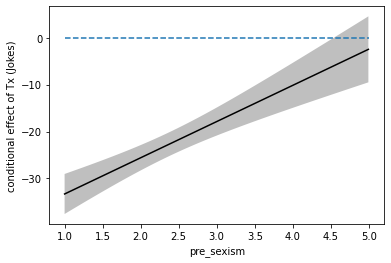

In [63]:
fig = plt.figure()
plt.plot(intdf.MVZ, intdf.conbx1, c='black')
plt.fill_between(intdf.MVZ, intdf.lowerx1, intdf.upperx1, facecolor='grey', alpha=0.5)
plt.hlines(y=0, xmin=1,xmax=5, linestyles='dashed')
plt.xlabel('pre_sexism')
plt.ylabel('conditional effect of Tx (Jokes)')
plt.show()

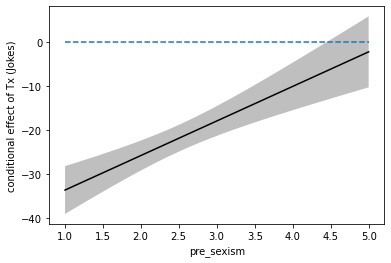

In [64]:
fig

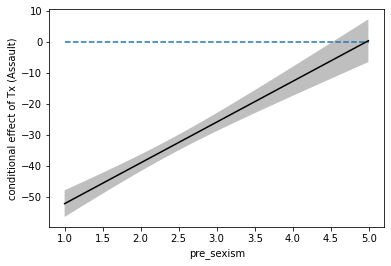

In [64]:
fig=plt.figure()
plt.plot(intdf.MVZ, intdf.conbx2, c='black')
plt.fill_between(intdf.MVZ, intdf.lowerx2, intdf.upperx2, facecolor='grey', alpha=0.5)
plt.hlines(y=0, xmin=1,xmax=5, linestyles='dashed')
plt.xlabel('pre_sexism')
plt.ylabel('conditional effect of Tx (Assault)')
plt.show()

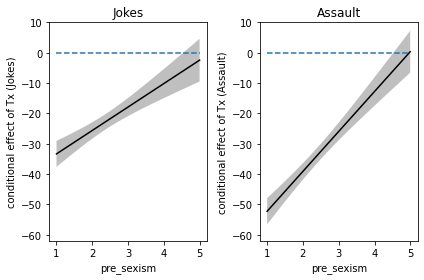

In [65]:
# show figures side by side
fig=plt.figure()

plt.subplot(1,2,1) # elements in parens are rows, cols, subplot number
plt.plot(intdf.MVZ, intdf.conbx1, c='black')
plt.fill_between(intdf.MVZ, intdf.lowerx1, intdf.upperx1, facecolor='grey', alpha=0.5) # shade area between confidence bounds
plt.hlines(y=0, xmin=1,xmax=5, linestyles='dashed')
plt.ylim(bottom=-62, top=10)
plt.xlabel('pre_sexism')
plt.ylabel('conditional effect of Tx (Jokes)')
plt.title('Jokes')

plt.subplot(1,2,2)
plt.plot(intdf.MVZ, intdf.conbx2, c='black')
plt.fill_between(intdf.MVZ, intdf.lowerx2, intdf.upperx2, facecolor='grey', alpha=0.5) 
plt.hlines(y=0, xmin=1,xmax=5, linestyles='dashed')
plt.ylim(bottom=-62, top=10)
plt.xlabel('pre_sexism')
plt.ylabel('conditional effect of Tx (Assault)')
plt.title('Assault')

plt.tight_layout() # reduces overlap
plt.show()

In [66]:
fig.savefig('./figures/fig5.png', bbox_inches='tight', dpi=300)

In [74]:
# FIGURE 6
m6 = sm.ols(formula="perchange_vote ~ condition2 + pre_sexism + condition2*pre_sexism", 
                data=df).fit()
m6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         perchange_vote   R-squared:                       0.139
Model:                            OLS   Adj. R-squared:                  0.138
Method:                 Least Squares   F-statistic:                     90.65
Date:                Fri, 01 Jan 2021   Prob (F-statistic):           1.24e-88
Time:                        17:47:39   Log-Likelihood:                -13917.
No. Observations:                2806   AIC:                         2.785e+04
Df Residuals:                    2800   BIC:                         2.788e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                            5.7705      2.875      2.007      0.045       0.134      11.407
condition2[T.Jokes]                -34.2873      4.081     -8.402      0.000     -42.289     -26.285
condition2[T.Assault]              -54.5950      4.091    -13.345      0.000     -62.617     -46.573
pre_sexism                          -0.4524      1.110     -0.407      0.684      -2.629       1.725
condition2[T.Jokes]:pre_sexism       6.5787      1.582      4.159      0.000       3.477       9.681
condition2[T.Assault]:pre_sexism    10.5811      1.567      6.752      0.000       7.508      13.654
==============================================================================
Omnibus:                     3624.254   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1162284.903
Skew:                           6.824   Prob(JB):                         0.00
Kurtosis:                     101.767   Cond. No.                         27.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [75]:
# calculate values of modifying var Z (here, pre_sexism)
# df.pre_sexism.describe()
# pre_sexism ranges from 1-5 and increases in small increments
# so draw random sample of 500 obs from uniform distribution between 1-5
MVZ = np.random.uniform(1,5,500)
MVZ = sorted(MVZ)
# put them in dataframe and add other vars
intdf = pd.DataFrame()
intdf['MVZ'] = MVZ
intdf['b1'] = m6.params[1]
intdf['b2'] = m6.params[2]
intdf['b4'] = m6.params[4]
intdf['b5'] = m6.params[5]
# var-cov matrix is:
varcovm6 = pd.DataFrame(m6.cov_params())
#varcovm5
intdf['varb1'] = varcovm6.iloc[1,1]
intdf['varb2'] = varcovm6.iloc[2,2]
intdf['varb4'] = varcovm6.iloc[4,4]
intdf['varb5'] = varcovm6.iloc[5,5]
intdf['covb1b4'] =  varcovm6.iloc[1,4]
intdf['covb2b5'] =  varcovm6.iloc[2,5]
intdf

,MVZ,b1,b2,b4,b5,varb1,varb2,varb4,varb5,covb1b4,covb2b5
0,1.023736,-34.287324,-54.595039,6.578677,10.581088,16.654775,16.735832,2.502489,2.455694,-5.936114,-5.906647
1,1.028184,-34.287324,-54.595039,6.578677,10.581088,16.654775,16.735832,2.502489,2.455694,-5.936114,-5.906647
2,1.041505,-34.287324,-54.595039,6.578677,10.581088,16.654775,16.735832,2.502489,2.455694,-5.936114,-5.906647
3,1.052909,-34.287324,-54.595039,6.578677,10.581088,16.654775,16.735832,2.502489,2.455694,-5.936114,-5.906647
4,1.063812,-34.287324,-54.595039,6.578677,10.581088,16.654775,16.735832,2.502489,2.455694,-5.936114,-5.906647
...,...,...,...,...,...,...,...,...,...,...,...
495,4.954967,-34.287324,-54.595039,6.578677,10.581088,16.654775,16.735832,2.502489,2.455694,-5.936114,-5.906647
496,4.978686,-34.287324,-54.595039,6.578677,10.581088,16.654775,16.735832,2.502489,2.455694,-5.936114,-5.906647
497,4.979445,-34.287324,-54.595039,6.578677,10.581088,16.654775,16.735832,2.502489,2.455694,-5.936114,-5.906647
498,4.983556,-34.287324,-54.595039,6.578677,10.581088,16.654775,16.735832,2.502489,2.455694,-5.936114,-5.906647


In [76]:
intdf['conbx1']=intdf.b1+(intdf.b4*intdf.MVZ)
intdf['consx1']=(intdf.varb1+(intdf.varb4*(intdf.MVZ**2))+2*intdf.covb1b4*intdf.MVZ)**.5 # could also use ** to calc sqrt
intdf['err1']=1.96*intdf.consx1
intdf['upperx1']=intdf.conbx1+intdf.err1
intdf['lowerx1']=intdf.conbx1-intdf.err1 # could separate multiple statements with semi-colon (;)

intdf['conbx2']=intdf.b2+(intdf.b5*intdf.MVZ)
intdf['consx2']=(intdf.varb2+(intdf.varb5*(intdf.MVZ**2))+2*intdf.covb2b5*intdf.MVZ)**.5 # could also use ** to calc sqrt
intdf['err2']=1.96*intdf.consx2
intdf['upperx2']=intdf.conbx2+intdf.err2
intdf['lowerx2']=intdf.conbx2-intdf.err2 # could separate multiple statements with semi-colon (;)
intdf

,MVZ,b1,b2,b4,b5,varb1,varb2,varb4,varb5,covb1b4,...,conbx1,consx1,err1,upperx1,lowerx1,conbx2,consx2,err2,upperx2,lowerx2
0,1.023736,-34.287324,-54.595039,6.578677,10.581088,16.654775,16.735832,2.502489,2.455694,-5.936114,...,-27.552498,2.668979,5.231198,-22.321300,-32.783696,-43.762803,2.686223,5.264997,-38.497806,-49.027800
1,1.028184,-34.287324,-54.595039,6.578677,10.581088,16.654775,16.735832,2.502489,2.455694,-5.936114,...,-27.523231,2.663358,5.220181,-22.303050,-32.743412,-43.715729,2.680607,5.253990,-38.461739,-48.969720
2,1.041505,-34.287324,-54.595039,6.578677,10.581088,16.654775,16.735832,2.502489,2.455694,-5.936114,...,-27.435600,2.646568,5.187273,-22.248326,-32.622873,-43.574784,2.663832,5.221110,-38.353675,-48.795894
3,1.052909,-34.287324,-54.595039,6.578677,10.581088,16.654775,16.735832,2.502489,2.455694,-5.936114,...,-27.360573,2.632242,5.159195,-22.201378,-32.519768,-43.454112,2.649515,5.193050,-38.261063,-48.647162
4,1.063812,-34.287324,-54.595039,6.578677,10.581088,16.654775,16.735832,2.502489,2.455694,-5.936114,...,-27.288849,2.618590,5.132436,-22.156413,-32.421285,-43.338752,2.635869,5.166304,-38.172448,-48.505055
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,4.954967,-34.287324,-54.595039,6.578677,10.581088,16.654775,16.735832,2.502489,2.455694,-5.936114,...,-1.690193,4.389605,8.603625,6.913433,-10.293818,-2.166094,4.300326,8.428640,6.262546,-10.594734
496,4.978686,-34.287324,-54.595039,6.578677,10.581088,16.654775,16.735832,2.502489,2.455694,-5.936114,...,-1.534155,4.424551,8.672121,7.137966,-10.206276,-1.915124,4.334882,8.496370,6.581245,-10.411494
497,4.979445,-34.287324,-54.595039,6.578677,10.581088,16.654775,16.735832,2.502489,2.455694,-5.936114,...,-1.529161,4.425671,8.674314,7.145153,-10.203475,-1.907093,4.335989,8.498538,6.591446,-10.405631
498,4.983556,-34.287324,-54.595039,6.578677,10.581088,16.654775,16.735832,2.502489,2.455694,-5.936114,...,-1.502116,4.431732,8.686195,7.184079,-10.188311,-1.863594,4.341983,8.510287,6.646693,-10.373880


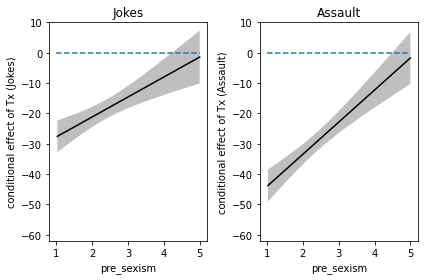

In [77]:
# show figures side by side
fig=plt.figure()

plt.subplot(1,2,1) # elements in parens are rows, cols, subplot number
plt.plot(intdf.MVZ, intdf.conbx1, c='black')
plt.fill_between(intdf.MVZ, intdf.lowerx1, intdf.upperx1, facecolor='grey', alpha=0.5) # shade area between confidence bounds
plt.hlines(y=0, xmin=1,xmax=5, linestyles='dashed')
plt.ylim(bottom=-62, top=10)
plt.xlabel('pre_sexism')
plt.ylabel('conditional effect of Tx (Jokes)')
plt.title('Jokes')

plt.subplot(1,2,2)
plt.plot(intdf.MVZ, intdf.conbx2, c='black')
plt.fill_between(intdf.MVZ, intdf.lowerx2, intdf.upperx2, facecolor='grey', alpha=0.5) 
plt.hlines(y=0, xmin=1,xmax=5, linestyles='dashed')
plt.ylim(bottom=-62, top=10)
plt.xlabel('pre_sexism')
plt.ylabel('conditional effect of Tx (Assault)')
plt.title('Assault')

plt.tight_layout() # reduces overlap
plt.show()

In [ ]:
fig.savefig('./figures/fig6.png', bbox_inches='tight', dpi=300)

In [ ]:
sns.regplot(x="pre_sexism", y="meanpunishment", data=df)